In [1]:
# import necessary modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from Helper_Functions import Get_LCDM_Pks, Get_DMEFF_Pks, Get_WDM_Tx, Calc_K_Max

### Initialize Fiducial Model of Class

In [2]:
# generate Pk's of LCDM model
h=0.6727; omega_b=0.02222; omega_cdm=0.1199; tau_reio=0.078; A_s=2.1985e-9; n_s=0.9652; P_k_max=600; k_per_decade=20
k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade)

### Slide Through Parameter Space

#### Using Minimum Observed Halo Mass to Constrain Cross Sectional Space

In [3]:
# Calculate k_max from given minimum observed halo mass 
k_max = Calc_K_Max(omega_b, omega_cdm, h)

In [4]:
# Initialize parameter space 
m_dmeff_vec = np.logspace(2,-5,15); sigma_dmeff_vec = np.logspace(-25,-29,100)
omega_dmeff=0.1199; npow_dmeff=0.0; dmeff_target='hydrogen'; 
# Create a vector to hold minimum cross sections for all DM masses
min_sigma_vec = np.zeros(len(m_dmeff_vec))

In [5]:
# Slide through DM mass/cross section parameter space to find minimum cross-sections for given DM mass 
# i.e. the sigma matching at half-mode to k_max (for given DM mass)

delta = 100  #This will set the difference between k_max and k corresponding to half Transfer fx
#s = round(len(sigma_dmeff_vec)/2)       #Index of vector holding cross sections... begin at middle cross section 
s = 10
for m in range(len(m_dmeff_vec)):
    while delta > 2:
        # Create Interacting Instance of Class
        k_vec, DMEFF_Pk_vec = Get_DMEFF_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, omega_dmeff, \
                                    sigma_dmeff_vec[s], m_dmeff_vec[m], npow_dmeff, dmeff_target, k_per_decade)
        Half_Transfer_Index = min(min(np.where(np.around(DMEFF_Pk_vec/LCDM_Pk_vec,1)==0.3)))
        if k_vec[Half_Transfer_Index] - k_max < 0:
            s += 1
        else:
            s -= 1
        delta = abs(k_vec[Half_Transfer_Index] - k_max)
        #print(s)
    print(m) #, delta)
    min_sigma_vec[m] = sigma_dmeff_vec[s]
    delta = 100

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


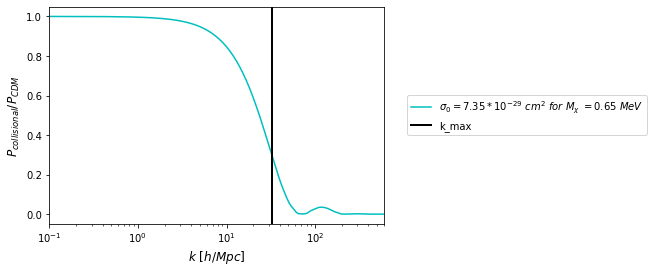

In [6]:
# Sanity Check 
#Plot Transfer Function of an InterX model at Min Cross Section
#To confirm it lines up with k_max of Min Halo Max
k_vec, DMEFF_Pk_vec = Get_DMEFF_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, omega_dmeff, \
                                    min_sigma_vec[5], m_dmeff_vec[5], npow_dmeff, dmeff_target, k_per_decade)
plt.plot(k_vec,DMEFF_Pk_vec/LCDM_Pk_vec,'c-',label=r'$\sigma_0 = 7.35 * 10^{-29}$ $cm^{2}$ $for$ $M_\chi$ $= 0.65$ $MeV$')
plt.axvline(x=k_max, lw = 2, color = 'k',label=r'k_max')
# Plot specifications
plt.xscale("log")
plt.xlim(1e-1,k_vec[-1])
plt.ylabel(r'$P_{collisional}/P_{CDM}$',fontsize=12)
plt.xlabel(r'$k\ [h/Mpc]$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

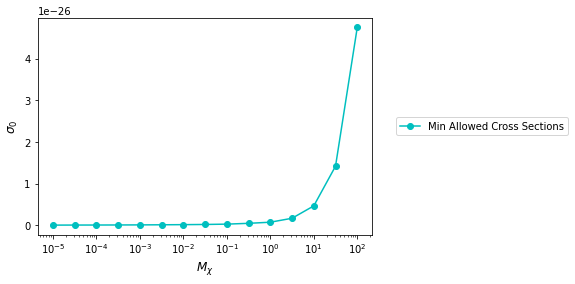

In [7]:
# Plot Parameter Space
plt.plot(m_dmeff_vec,min_sigma_vec,'co-', label=r'Min Allowed Cross Sections')
# Plot specifications
plt.xscale("log")
plt.ylabel(r'$\sigma_0$',fontsize=12)
plt.xlabel(r'$M_{\chi}$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(1.6, 0.5))

### Slide Through Parameter Space

#### Using WDM Cutoff to Constrain Cross Sectional Parameter Space

In [8]:
# generate WDM Cutoff
omega_dmeff=0.1199; m_dmeff = 3.26 #KeV 
k_vec, WDM_Tx_vec = Get_WDM_Tx(m_dmeff, omega_dmeff, k_vec, h)
WDM_k_Cutoff = k_vec[min(min(np.where(np.around(WDM_Tx_vec,1)==0.3)))]

In [9]:
# Initialize parameter space 
m_dmeff_vec_2 = np.logspace(2,-5,15); sigma_dmeff_vec_2 = np.logspace(-25,-29,100)
# Create a vector to hold minimum cross sections for all DM masses
min_sigma_vec_2 = np.zeros(len(m_dmeff_vec_2))

In [10]:
# Slide through DM mass/cross section parameter space to find minimum cross-sections for given DM mass 
# i.e. the sigma matching at half-mode to WDM_K_Cutoff's half-mode (for given DM mass)
delta = 100  #This will set the difference between k_max and k corresponding to half Transfer fx
#s = round(len(sigma_dmeff_vec_2)/2)       #Index of vector holding cross sections... begin at middle cross section 
s=10
for m in range(len(m_dmeff_vec_2)):
    while delta > 2:
        # Create Interacting Instance of Class
        k_vec, DMEFF_Pk_vec = Get_DMEFF_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, omega_dmeff, \
                                    sigma_dmeff_vec_2[s], m_dmeff_vec_2[m], npow_dmeff, dmeff_target, k_per_decade)
        Half_Transfer_Index = min(min(np.where(np.around(DMEFF_Pk_vec/LCDM_Pk_vec,1)==0.3)))
        if k_vec[Half_Transfer_Index] - WDM_k_Cutoff < 0:
            s += 1
        else:
            s -= 1
        delta = abs(k_vec[Half_Transfer_Index] - WDM_k_Cutoff)
        #print(s)
    print(m) #, delta)
    min_sigma_vec_2[m] = sigma_dmeff_vec_2[s]
    delta = 100

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


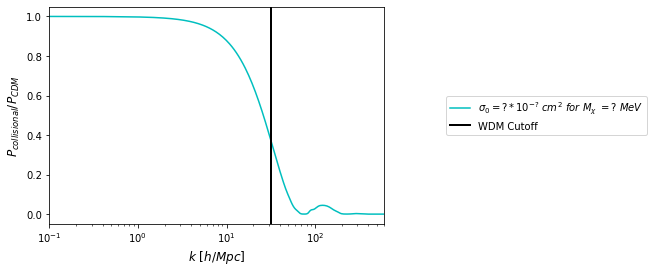

In [31]:
# Sanity Check 
#Plot Transfer Function of an InterX model at Min Cross Section
#To confirm it lines up with k_max of Min Halo Max
h=0.6727; omega_b=0.02222; omega_cdm=0.1199; tau_reio=0.078; A_s=2.1985e-9; n_s=0.9652; P_k_max=600; k_per_decade=20
k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade)
k_vec, DMEFF_Pk_vec = Get_DMEFF_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, omega_dmeff, \
                                    min_sigma_vec_2[6], m_dmeff_vec_2[6], npow_dmeff, dmeff_target, k_per_decade)
plt.plot(k_vec,DMEFF_Pk_vec/LCDM_Pk_vec,'c-',label=r'$\sigma_0 = ? * 10^{-?}$ $cm^{2}$ $for$ $M_\chi$ $= ?$ $MeV$')
plt.axvline(x=WDM_k_Cutoff, lw = 2, color = 'k',label=r'WDM Cutoff')
# Plot specifications
plt.xscale("log")
plt.xlim(1e-1,k_vec[-1])
plt.ylabel(r'$P_{collisional}/P_{CDM}$',fontsize=12)
plt.xlabel(r'$k\ [h/Mpc]$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

(1e-05, 100.0)

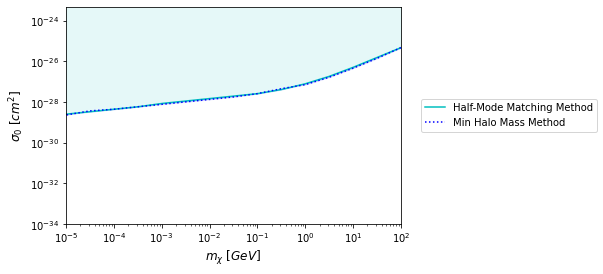

In [33]:
# Plot Parameter Space
plt.plot(m_dmeff_vec_2,min_sigma_vec_2,'c-', label=r'Half-Mode Matching Method')
plt.plot(m_dmeff_vec,min_sigma_vec,'b:', label=r'Min Halo Mass Method')
# Plot specifications
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r'$\sigma_0$ $[cm^2]$',fontsize=12)
plt.xlabel(r'$m_{\chi}$ $[GeV]$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(1.6, 0.5))
plt.fill_between(m_dmeff_vec_2,min_sigma_vec_2,10e-24, color='c', alpha=.1)
plt.fill_between(m_dmeff_vec_2,min_sigma_vec,min_sigma_vec_2, color='b', alpha=.1)
plt.ylim(1e-34,5e-24)
plt.xlim(1e-5,1e2)

In [13]:
# np.savetxt('Masses_Vec.txt', m_dmeff_vec)
# np.savetxt('Sigma_Vec.txt', sigma_dmeff_vec)
# np.savetxt('Min_Sigma_Analytic.txt', min_sigma_vec)
# np.savetxt('Min_Sigma_Half_Mode.txt', min_sigma_vec_2)

### Slide Through Parameter Space

#### Using The Envelope Method


In [14]:
# Generate Pk's of LCDM Model 
h=0.6727; omega_b=0.02222; omega_cdm=0.1199; tau_reio=0.078; A_s=2.1985e-9; n_s=0.9652; P_k_max=300; k_per_decade=40
k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade)

In [15]:
# Create the Envelope

# Calculate k_max from given minimum observed halo mass 
k_max = Calc_K_Max(omega_b, omega_cdm, h)

# Generate the T^2 of the WDM lower mass limit
omega_dmeff=0.1199; m_dmeff = 3.26 #KeV 
k_vec, WDM_Tx_vec = Get_WDM_Tx(m_dmeff, omega_dmeff, k_vec, h)

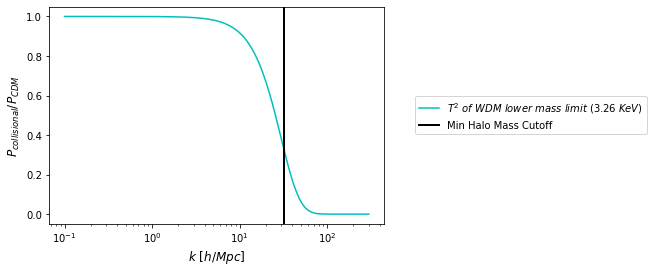

In [16]:
# Visualize Envelope
plt.plot(k_vec,WDM_Tx_vec,'c-',label=r'$T^2$ $of$ $WDM$ $lower$ $mass$ $limit$ $(3.26$ $KeV)$')
plt.axvline(x=k_max, lw = 2, color = 'k',label=r'Min Halo Mass Cutoff')

# Plot specifications
plt.xscale("log")
#plt.xlim(1e-1,k_vec[-1])
plt.ylabel(r'$P_{collisional}/P_{CDM}$',fontsize=12)
plt.xlabel(r'$k\ [h/Mpc]$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

In [17]:
# Generate Pk's of LCDM Model up through k_max
h=0.6727; omega_b=0.02222; omega_cdm=0.1199; tau_reio=0.078; A_s=2.1985e-9; n_s=0.9652; P_k_max=k_max; k_per_decade=40
k_vec, LCDM_Pk_vec = Get_LCDM_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade)

# Initialize parameter space 
omega_dmeff=0.1199; npow_dmeff=0.0; dmeff_target='hydrogen'; 
m_dmeff_vec_3 = np.logspace(-5,2,15); sigma_dmeff_vec_3 = np.logspace(-29,-25,100)

# Create a vector to hold minimum cross sections for all DM masses
min_sigma_vec_3 = np.zeros(len(m_dmeff_vec_3))

In [18]:
# Slide through DM mass/cross section parameter space to find maximum cross sections for given DM mass
# i.e. the sigma where WDM T^2 - DMEFF T^2 first has neg. value
delta = 0
s = -1       #Index of vector holding cross sections 
for m in range(len(m_dmeff_vec_3)):
    while delta > -0.0001:
        s += 1
        # Create Interacting Instance of Class
        k_vec, DMEFF_Pk_vec = Get_DMEFF_Pks(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, omega_dmeff, \
                                    sigma_dmeff_vec_3[s], m_dmeff_vec_3[m], npow_dmeff, dmeff_target, k_per_decade)
        delta = min(DMEFF_Pk_vec/LCDM_Pk_vec - WDM_Tx_vec)
        #print(s, delta)
    print(m)
    min_sigma_vec_3[m] = sigma_dmeff_vec_3[s]
    delta = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


(1e-05, 100.0)

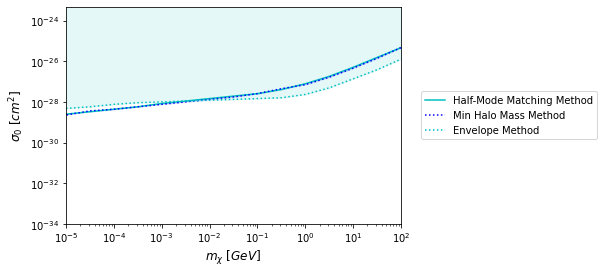

In [34]:
# Plot Parameter Space
plt.plot(m_dmeff_vec_2,min_sigma_vec_2,'c-', label=r'Half-Mode Matching Method')
plt.plot(m_dmeff_vec,min_sigma_vec,'b:', label=r'Min Halo Mass Method')
plt.plot(m_dmeff_vec_3,min_sigma_vec_3,'c:', label=r'Envelope Method')



# Plot specifications
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r'$\sigma_0$ $[cm^2]$',fontsize=12)
plt.xlabel(r'$m_{\chi}$ $[GeV]$',fontsize=12)
plt.legend(loc='right',bbox_to_anchor=(1.6, 0.5))
plt.fill_between(m_dmeff_vec_3,min_sigma_vec_3,10e-24, color='c', alpha=.1)
#plt.fill_between(m_dmeff_vec_2,min_sigma_vec_2,10e-24, color='c', alpha=.1)
plt.fill_between(m_dmeff_vec_2,min_sigma_vec,min_sigma_vec_2, color='b', alpha=.1)
plt.ylim(1e-34,5e-24)
plt.xlim(1e-5,1e2)